Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

## Содержание проекта  <a class="anchor" id="0-bullet">
* [Шаг 1. Аналитика](#1-bullet)
* [Шаг 2. Проверка гипотезы](#2-bullet)
* [Шаг 3. Общий вывод](#3-bullet)   

In [1]:
# Импортируем библиотеки, необходимые для выполнения проекта
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Путь к файлам данных
datasets_path = ''
datasets_path = 'C:/Users/Venik/OneDrive/Документы/Yandex_Praktikum/Data_Extracting'

# 1. Аналитика<a class="anchor" id="1-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [3]:
# Прочитаем файл с количеством рейсов в разрезе ЛА
#query_1 = pd.read_csv(datasets_path + '/datasets/query_1.csv')
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


**Таблица содержит 8 записей, название ЛА имеет строковый формат, количество рейсов - целое. Пропусков нет.** 

In [5]:
# Посчитаем примерный пассажиропоток по каждой модели самолета
def passengers(row):
    if row['model'] == 'Airbus A319-100':
        passengers = 138
    elif row['model'] == 'Airbus A321-200':
        passengers = 220
    elif row['model'] == 'Boeing 737-300':
        passengers = 149
    elif row['model'] == 'Boeing 767-300':
        passengers = 328
    elif row['model'] == 'Boeing 777-300':
        passengers = 550
    elif row['model'] == 'Bombardier CRJ-200':
        passengers = 50
    elif row['model'] == 'Cessna 208 Caravan':
        passengers = 9
    elif row['model'] == 'Sukhoi SuperJet-100':
        passengers = 98
    return passengers * row['flights_amount'] * 0.8

query_1['passengers_amount'] = query_1.apply(passengers, axis=1)
query_1

,model,flights_amount,passengers_amount
0,Airbus A319-100,607,67012.8
1,Airbus A321-200,960,168960.0
2,Boeing 737-300,630,75096.0
3,Boeing 767-300,600,157440.0
4,Boeing 777-300,300,132000.0
5,Bombardier CRJ-200,4446,177840.0
6,Cessna 208 Caravan,4557,32810.4
7,Sukhoi SuperJet-100,4185,328104.0


In [6]:
query_1.sort_values('flights_amount', ascending = False) 

,model,flights_amount,passengers_amount
6,Cessna 208 Caravan,4557,32810.4
5,Bombardier CRJ-200,4446,177840.0
7,Sukhoi SuperJet-100,4185,328104.0
1,Airbus A321-200,960,168960.0
2,Boeing 737-300,630,75096.0
0,Airbus A319-100,607,67012.8
3,Boeing 767-300,600,157440.0
4,Boeing 777-300,300,132000.0


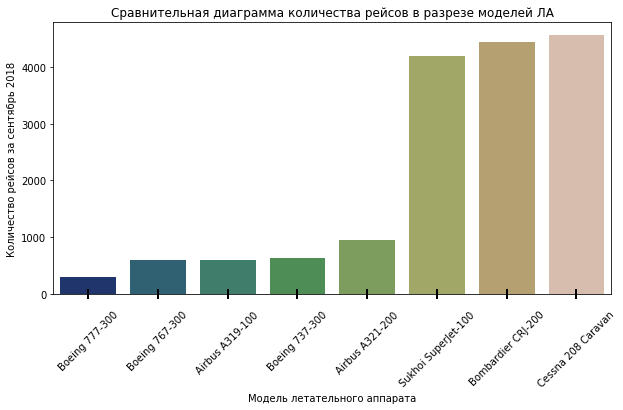

In [7]:
# Построим сравнительную диаграмму по количеству рейсов в разрезе моделей
plt.figure(figsize=(10,5))

g = sns.barplot(x="model", 
                y="flights_amount",
                hue=None, 
                palette="gist_earth",
                dodge = False,
                ci=None, 
                data=query_1.sort_values('flights_amount'))

g.set_title("Сравнительная диаграмма количества рейсов в разрезе моделей ЛА")
g.set_xlabel("Модель летательного аппарата")
g.set_ylabel("Количество рейсов за сентябрь 2018")

g.tick_params(axis = 'x',    
              which = 'major',
              direction = 'inout',
              length = 10,
              width = 2,
              pad = 10,
              labelsize = 10,
              bottom = True,
              labelbottom = True,
              labelrotation = 45)

In [8]:
query_1.sort_values('passengers_amount', ascending = False)

,model,flights_amount,passengers_amount
7,Sukhoi SuperJet-100,4185,328104.0
5,Bombardier CRJ-200,4446,177840.0
1,Airbus A321-200,960,168960.0
3,Boeing 767-300,600,157440.0
4,Boeing 777-300,300,132000.0
2,Boeing 737-300,630,75096.0
0,Airbus A319-100,607,67012.8
6,Cessna 208 Caravan,4557,32810.4


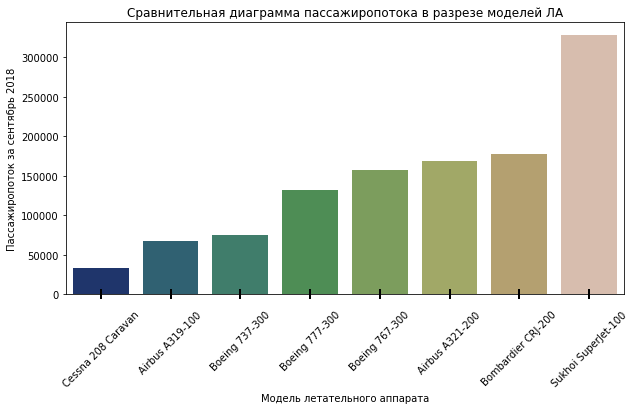

In [9]:
# Построим сравнительную диаграмму по пассажиропотоку в разрезе моделей
plt.figure(figsize=(10,5))

g = sns.barplot(x="model", 
                y="passengers_amount",
                hue=None, 
                palette="gist_earth",
                dodge = False,
                ci=None, 
                data=query_1.sort_values('passengers_amount'))

g.set_title("Сравнительная диаграмма пассажиропотока в разрезе моделей ЛА")
g.set_xlabel("Модель летательного аппарата")
g.set_ylabel("Пассажиропоток за сентябрь 2018")

g.tick_params(axis = 'x',    
              which = 'major',
              direction = 'inout',
              length = 10,
              width = 2,
              pad = 10,
              labelsize = 10,
              bottom = True,
              labelbottom = True,
              labelrotation = 45)

### <span style="color:green">Выводы по данным о количестве рейсов по моделям ЛА<span>

<span style="color:blue">
Большей информативностью, конечно обладает количество пассажиров, которые были перевезены той или иной моделью летательного аппарата. Поэтому для расчета этого показателя мы взяли примерную загрузку рейсов равную 80% и вычислили пассажиропоток по каждой модели за сентябрь 2018 г.
    
1. Наибольшее количество рейсов приходится на малые местные пассажирские самолеты <b>'Cessna 208 Caravan'</b> с дальностью полета не более 1,7 тыс.км. Однако при том, что количество мест в этой модели самолета для РФ - 9, эти самолеты сгенерировали небольшой пассажиропоток <b>(около 33 тыс. пассажиров)</b>.
2. Далее идет ближнемагистральный <b>'Bombardier CRJ-200'</b>. Примерный пассажиропоток, перевезенный при помощи этой модели самолета - 178 тыс. пассажиров.
3. На третьем месте с точки зрения количества рейсов, ЛА отечественной разработки - <b>'Sukhoi SuperJet-100'</b>. Это не удивительно, т.к. это самая новая модель среднемагистрального ЛА. В то же время он с большим отрывом держит первое место по пассажиропотоку - почти 330 тыс. пассажиров.    
4. Далее идут менее популярные модели: <b>'Airbus A321-200' (960 рейсов и 169 тыс. пассажиров), 'Airbus A321-200' (960 рейсов и 169 тыс. пассажиров), 'Airbus A321-200' (960 рейсов и 169 тыс. пассажиров), 'Airbus A321-200' (960 рейсов и 169 тыс. пассажиров)</b>.
5. Замыкает таблицу по количеству рейсов самый новый дальнемагистральный ЛА от Boeing - <b>'Boeing 777-300</b>. Однако при его вместимости у него очень существенная доля пассажиропотока - <b>132 тыс. пассажиров</b>.
<span>

<span style="color:red">
<b>Какие-то однозначные выводы сделать сложно. В перевозках используются ЛА различных классов и производителей Напрашивается только один однозначный вывод. По пассажиропотоку с огромным отрывом лидирует ЛА отечественной разработки: 'Sukhoi SuperJet-100'.</b>
<span>

In [10]:
# Прочитаем файл cо статистикой количества прибывающих рейсов в разрезе городов
#query_3 = pd.read_csv(datasets_path + '/datasets/query_3.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [11]:
query_3.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


**Таблица содержит 101 запись, поле "Город" имеет строковый формат, количество рейсов - дробное число с плавающей точкой. Пропусков нет.**

In [12]:
# Построим сравнительную диаграмму по количеству рейсов в разрезе моделей
# т. к. количество городов > 100, выведем города, где среднее количество рейсов в день больше 5,
# а остальные включим в категорию "Прочие"

def city_category(row):
    if row['average_flights'] >= 5:
        return row['city']
    else:
        return 'Прочие (менее 5 рейсов)'

query_3['city_category'] = query_3.apply(city_category, axis=1)

query_3_more_5 = (query_3.query('city_category != "Прочие (менее 5 рейсов)"').sort_values(['average_flights'], 
                                                                                         ascending=False)
                 [['city', 'average_flights']])
query_3_less_5 = (query_3.query('city_category == "Прочие (менее 5 рейсов)"').groupby(['city_category'])
                  .agg({'average_flights': ['sum']}).reset_index())

query_3_less_5.columns = ['city', 'average_flights']

query_3_grouped = pd.concat([query_3_more_5, query_3_less_5])

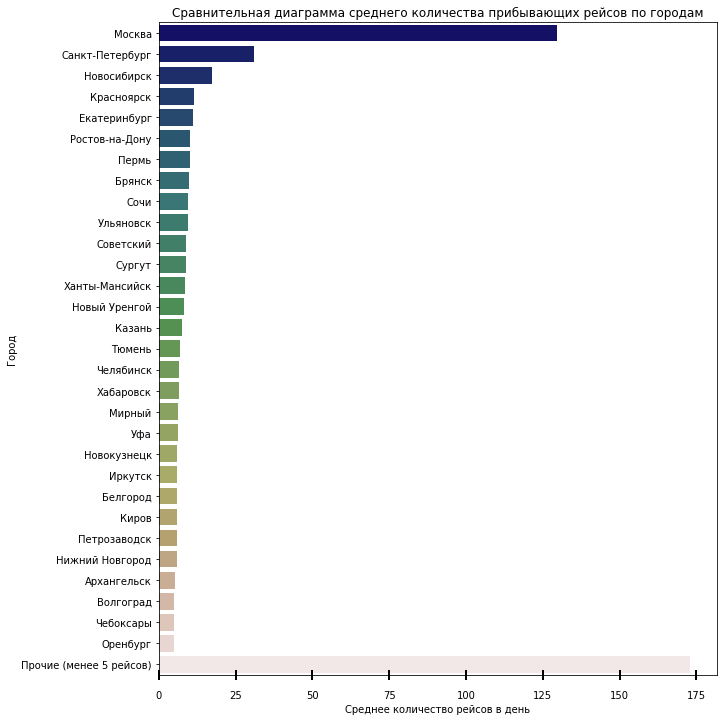

In [13]:
plt.figure(figsize=(10,12))

g = sns.barplot(x="average_flights", 
                y="city",
                hue=None, 
                palette="gist_earth",
                dodge = False,
                ci=None, 
                data=query_3_grouped)

g.set_title("Сравнительная диаграмма среднего количества прибывающих рейсов по городам")
g.set_xlabel("Среднее количество рейсов в день")
g.set_ylabel("Город")

g.tick_params(axis = 'x',    
              which = 'major',
              direction = 'inout',
              length = 10,
              width = 2,
              pad = 10,
              labelsize = 10,
              bottom = True,
              labelbottom = True,
              labelrotation = 0)

In [14]:
query_3_grouped

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


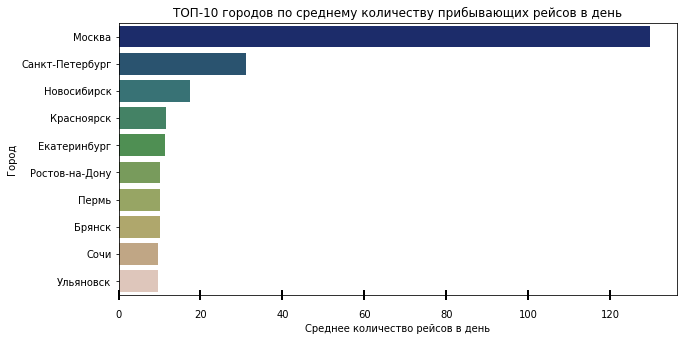

In [15]:
plt.figure(figsize=(10,5))

g = sns.barplot(x="average_flights", 
                y="city",
                hue=None, 
                palette="gist_earth",
                dodge = False,
                ci=None, 
                data=query_3.sort_values(['average_flights'], ascending=False).head(10))

g.set_title("ТОП-10 городов по среднему количеству прибывающих рейсов в день")
g.set_xlabel("Среднее количество рейсов в день")
g.set_ylabel("Город")

g.tick_params(axis = 'x',    
              which = 'major',
              direction = 'inout',
              length = 10,
              width = 2,
              pad = 10,
              labelsize = 10,
              bottom = True,
              labelbottom = True,
              labelrotation = 0)

### <span style="color:green">Анализ среднего количества рейсов в день по городам<span>

<span style="color:blue">
Количество городов, в которых среднее <b>ежедневное количество рейсов превышает 5 составляет менее 30%</b>. В остальных городах их меньше. Среднедневное количество рейсмов по всем этим городам, в 1,5 раза выше, чем в Москве. <b>Общее ежедневное количество рейсов - 173</b>.

Если брать <b>ТОП-10</b> городов по среднему количеству рейсов, то среди них лидирует <b>Москва</b> (что не удивительно, это узловой пункт, через который проходит большинство "стыковочных" рейсов). Далее идет <b>Санкт-Петербург</b>. Помимо стыковочных рейсов это также популярный туристический город. Кроме них в десятку вошли <b>Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск</b>.
<span>

<span style="color:red">
<b>Какие-то однозначные выводы сделать сложно. В перевозках используются ЛА различных классов и производителей Напрашивается только один однозначный вывод. По пассажиропотоку с огромным отрывом лидирует ЛА отечественной разработки: 'Sukhoi SuperJet-100'.</b>
<span>

# 2. Проверка гипотезы<a class="anchor" id="2-bullet"></a>
👈[назад к оглавлению](#0-bullet)

In [16]:
# Прочитаем файл с понедельной статистикой пассажиропотока и данными о фестивалях
#query_last = pd.read_csv(datasets_path + '/datasets/query_last.csv')
query_last = pd.read_csv('/datasets/query_last.csv')
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [17]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


**Таблица содержит 10 записей, номер недели и количество купленных билетов - целые числа, без пропусков. В колонке с названием фестиваля и колонкой, определяющей, что неделя является фестивальной, есть пропуски. Данные заполнены только в тех строках, где есть фестиваль.**

**Заполним пропуски пустыми значениями, чтобы можно было сделать выборки.**

In [18]:
query_last['festival_week'] = query_last['festival_week'].fillna(0)
query_last['festival_name'] = query_last['festival_name'].fillna('')
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,0.0,
3,33,51378,0.0,
4,34,51492,0.0,
5,35,51360,0.0,
6,36,51386,36.0,Видфест
7,37,51670,0.0,
8,38,51518,0.0,
9,39,51623,0.0,


In [19]:
# Выделим из датасета две выборки - с фестивальными неделями и нет
festival_weeks = query_last.query('festival_week != 0')
non_festival_weeks = query_last.query('festival_week == 0')

<font color=brown>

## Гипотеза о влиянии музыкальных фестивалей на пассажиропоток

**Нулевая гипотеза:** наличие музыкальных фестивалей никака не влияет на пассажиропоток авиаперевозок в эти города. Билетов покупается одинаковое количество.

**Альтернативная гипотеза:** В те недели, когда в городе проходит фестиваль количество покупаемых в этот город билетов больше.

</font>

In [20]:
# Напишем функцию проверки гипотезы равенства средних двух совокупностей, 
# чтобы несколько раз не повторять код

def check_null_hypotesis(dataframe1,
                         dataframe2,
                         column_name,
                         hypotesis_name):
    
    alpha = .05

    results = st.ttest_ind(dataframe1[column_name], 
                           dataframe2[column_name],
                           equal_var=True)
    
    print('-------------------------------------------------------------')
    print(hypotesis_name)
    print('-------------------------------------------------------------')

    #print('p-значение: {:.20f}'.format(results.pvalue))
    print('p-значение: ', results.pvalue)
    print('')

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

    print('-------------------------------------------------------------')
    print('')

In [21]:
# Проверим гипотезу о равенстве средних расходов в разных тарифах
check_null_hypotesis(festival_weeks,
                     non_festival_weeks,
                     'ticket_amount',
                     'Гипотеза: наличие фестиваля не влияет на количество покупаемых билетов')  

-------------------------------------------------------------
Гипотеза: наличие фестиваля не влияет на количество покупаемых билетов
-------------------------------------------------------------
p-значение:  0.09688869045922928

Не получилось отвергнуть нулевую гипотезу
-------------------------------------------------------------



### <span style="color:green">Выводы относительно гипотезы о влиянии музыкальных фестивалей на пассажиропоток<span>

<span style="color:blue">
Мы выдвинули гипотезу о равенстве средних двух совокупностей. <b>Формулировка: наличие музыкальных фестивалей никака не влияет на пассажиропоток авиаперевозок в эти города. Билетов покупается одинаковое количество.</b> Гипотеза полностью подтвердилась. Вероятность того, что мы имеем дело со статистической погрешностью составляет менее 1%.

<span>

# 3. Общий вывод<a class="anchor" id="3-bullet"></a>
👈[назад к оглавлению](#0-bullet)

<span style="color:violet">
Проведя анализ имеющихся данных мы можем сделать следубщие выводы:
1. Наиболее эксплуатируемым пассажирским самолетом на территории РФ является <b>'Sukhoi SuperJet-100'</b>. Он в тройке лидеров по количеству рейсов и безусловный лидер по пассажиропотоку.
2. Городов, количество ежедневное количество рейсов более 5 всего лишь 30%. Безусловными лидерами являются Москва и Санкт-Петербург. 
3. В десятку лидеров также вошли <b>Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск</b>.
4. Наличие популярных музыкальных фестивалей в Москве никак не влияет на входящий пассажиропоток.    
<span>

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  Проверена гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»
- [x]  Есть пояснение «Как вы формулировали нулевую и альтернативную гипотезы»
- [x]  Есть пояснение «Какой критерий использовали для проверки гипотез и почему»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод